# E08 Dimensionality reduction

## Principal component analysis

In this week's exersice, you will investigate a dataset consisting of four variables using Principal Component Analysis (PCA). In particular, you will search for a smaller set of latent variables which can account for the dynamics in the original four variables. 

The four variables show some dynamics as function of time. Time varies in the interval [0,10] s. 

The dataset is stored in the binary numpy file `time-seriesPCA.npy` which can be loaded with the numpy `np.load()` function. The data is stored in a two-dimensional numpy array, where time is in the first column, x1 (the first variable) is in the second column, x2 in the third, x3 in the fourth, and x4 in the fifth column. Remember that columns can be accessed with `X[:,n]`, where X is the variable name and n is the index of the column (starting with 0). 
 


Let's start by importing the necessary libraries. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib notebook

# generating three time-dependent variables 
# t = np.arange(1000)/100. # time array 
# x1 = 20.*np.exp(-t) + (t-5)**2 + np.random.rand(len(t))*2
# x2 = -(t-5)**2  + np.random.rand(len(t))*2.
# x3 = 50.*np.exp(-t) - (t-5)**2 + np.random.rand(len(t))*2.
# x4 = -50.*np.exp(-t) + 0.5*(t-5)**2 + np.random.rand(len(t))*2.

# X = np.column_stack((t,x1,x2,x3,x4))
# np.save('time-seriesPCA.npy',X)

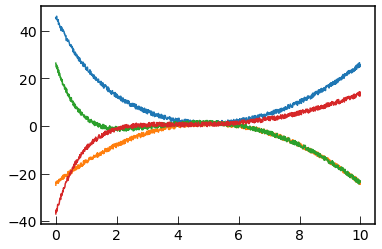

In [2]:
X  = np.load('time-seriesPCA.npy')
t = X[:,0]
x1  = X[:,1]
x2  = X[:,2]
x3  = X[:,3]
x4  = X[:,4]

fig = plt.figure()

ax = fig.add_subplot(111)
ax.plot(t,x1)
ax.plot(t,x2)
ax.plot(t,x3)
ax.plot(t,x4)

plt.show()

1. Perform Principal Component Analysis on the 4-dimensional dataset. Use the scikit learn module, specifically the `PCA` function in `sklearn.decomposition`. Set the number of principal compoents to calculate to four (i.e., extract as many principal components as variables in your original dataset). 

In [3]:
X = np.column_stack((x1,x2,x3,x4)) # first we have to concatenate the three variables 
pca = PCA(n_components=4)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

2. Based on the explained variance, how many principal components should you keep in order to account for a large fraction (more than 95 %) of the variance in your dataset? Remember that explained variance per principal compnent can be accessed with `pca.explained_variance_`. 

PCA components : [[ 0.70103784 -0.42038491  0.28819822 -0.49876273]
 [ 0.34586442 -0.44318331 -0.6844908   0.46415375]
 [-0.49720512 -0.77368074  0.35844872  0.16037363]
 [-0.37644498 -0.16817609 -0.56562235 -0.71419699]]
PCA explained variance : [189.510709   115.20438611   0.33520964   0.3074389 ]
[0.62061864 0.99789542 0.99899318 1.        ]


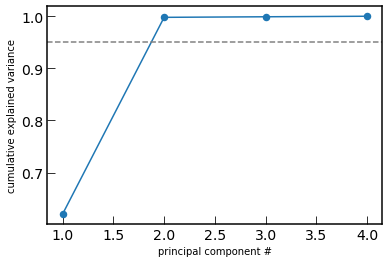

In [4]:
# your code goes here 
# perform PCA analysis 
print('PCA components :',pca.components_)
print('PCA explained variance :',pca.explained_variance_)
explVarFractional = pca.explained_variance_/sum(pca.explained_variance_)
print(np.cumsum(explVarFractional))

fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(np.arange(1,5),np.cumsum(explVarFractional),'o-')
ax.axhline(y=0.95,ls='--',c='0.5')
ax.set_xlabel('principal component #')
ax.set_ylabel('cumulative explained variance')

plt.show()

The first and the second principal components together account for 99.8 % of the variance in the orignal data. So those two components should be kept.  

3. Visualize the principal components chosen in exersice 2. Note that you first need to transform the orginal variables into the new principal component space, which can be done with `pca.transform()`. 

original shape :    (1000, 4)
transformed shape : (1000, 4)


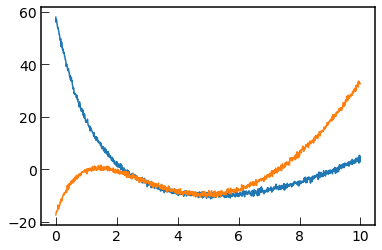

In [5]:
X_pca = pca.transform(X)

print("original shape :   ", X.shape)
print("transformed shape :", X_pca.shape)

# do PCA and plot principal components
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(t,X_pca[:,0])
ax1.plot(t,X_pca[:,1])
plt.show()

## The end